In [1]:
import os, glob
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import cv2

from scipy.ndimage.interpolation import zoom
from pydicom import dcmread

In [2]:
eot_dir = r'N:\2_Analysis\automated_analysis\Flint_SOT_EOT_volume\FLINT_EOT'
nii_output = r'N:\2_Analysis\automated_analysis\Flint_SOT_EOT_volume\FLINT_EOT_nii'

In [3]:
data_table = {'Patient ID' : [],
        'original slice spacing' : [],
        'spacing between stitching' : [],
        'num1 (index)' : [],
        'num2 (index)' : []}

In [4]:
patient_folders = os.listdir(eot_dir)
print(patient_folders), len(patient_folders)

['f_2421', 'f_2422', 'f_2423', 'f_2429', 'f_2433', 'f_2440', 'f_2481', 'f_3283', 'f_3284', 'f_3290', 'f_3297', 'f_3300', 'f_3325', 'f_3328', 'f_3334', 'f_3339', 'f_3342', 'f_3345', 'f_3346', 'f_4032', 'f_4069', 'f_4088', 'f_4093', 'f_4103', 'f_4153', 'f_4156', 'f_4176', 'f_4326', 'f_4329', 'f_4333', 'f_4335', 'f_4336', 'f_5084', 'f_5175', 'f_5338', 'f_5376', 'f_5390', 'f_5391', 'f_5392', 'f_5394', 'f_5397', 'f_5398', 'f_5405', 'f_5442', 'f_5443', 'f_5445', 'f_5446', 'f_5447', 'f_5448', 'f_5449', 'f_5458', 'f_5468', 'f_5471', 'f_5478', 'f_5480', 'f_5483', 'f_5488', 'f_6254', 'f_6261', 'f_6262', 'f_6269', 'f_6273', 'f_7089', 'f_7120', 'f_7274', 'f_7282', 'f_7295', 'f_7314', 'f_7315', 'f_7316', 'f_7318', 'f_7321', 'f_7322', 'f_7323', 'f_7324', 'f_7325', 'f_7341', 'f_7347', 'f_8120', 'f_8380', 'f_8385', 'f_8390', 'f_8391', 'f_8394']


(None, 84)

In [5]:
patient_id = 'f_4335'
#patient_id = patient_folders[4]

folder_path = os.path.join(eot_dir, patient_id)

dcm_list = []

for root, dirs, files in os.walk(folder_path):
    for file in files:
        if file.endswith(".dcm"):
            dcm_list.append(os.path.join(root, file))
            
data = {}
data['mag5_dcm_path'] = []
data['slice_location'] = []

for i in dcm_list:
    dcm = dcmread(i)
    echo_num = dcm.EchoNumbers
    if echo_num == 5:
        data['mag5_dcm_path'].append(i)
        data['slice_location'].append(dcm.SliceLocation)

data = pd.DataFrame.from_dict(data)

print(data.to_string())

                                                                                           mag5_dcm_path  slice_location
0   N:\2_Analysis\automated_analysis\Flint_SOT_EOT_volume\FLINT_EOT\f_4335\LQ_High_BH_5\IM-0068-0037.dcm        4.991695
1   N:\2_Analysis\automated_analysis\Flint_SOT_EOT_volume\FLINT_EOT\f_4335\LQ_High_BH_5\IM-0068-0038.dcm       14.991698
2   N:\2_Analysis\automated_analysis\Flint_SOT_EOT_volume\FLINT_EOT\f_4335\LQ_High_BH_5\IM-0068-0039.dcm       24.991702
3   N:\2_Analysis\automated_analysis\Flint_SOT_EOT_volume\FLINT_EOT\f_4335\LQ_High_BH_5\IM-0068-0040.dcm       34.991704
4   N:\2_Analysis\automated_analysis\Flint_SOT_EOT_volume\FLINT_EOT\f_4335\LQ_High_BH_5\IM-0068-0041.dcm       44.991707
5   N:\2_Analysis\automated_analysis\Flint_SOT_EOT_volume\FLINT_EOT\f_4335\LQ_High_BH_5\IM-0068-0042.dcm       54.991710
6   N:\2_Analysis\automated_analysis\Flint_SOT_EOT_volume\FLINT_EOT\f_4335\LQ_High_BH_5\IM-0068-0043.dcm       64.991713
7   N:\2_Analysis\automated_anal

In [419]:
num1 = 1  # TOP SLICE INDEX
num2 = 10  # BOTTOM SLICE INDEX

print(data['mag5_dcm_path'][num1]), print(data['slice_location'][num1])
print(data['mag5_dcm_path'][num2]), print(data['slice_location'][num2])

N:\2_Analysis\automated_analysis\Flint_SOT_EOT_volume\FLINT_EOT\f_3346\LIPOQUANT_2D_SUPERIOR_LIVER_5\IM-0004-0069.dcm
96.929092407227
N:\2_Analysis\automated_analysis\Flint_SOT_EOT_volume\FLINT_EOT\f_3346\LIPOQUANT_2D_INFERIOR_LIVER_6\IM-0005-0079.dcm
82.827066421509


(None, None)

In [420]:
top_view = data['mag5_dcm_path'][num1]
bot_view = list(data['mag5_dcm_path'][(num2-1):(num2+2)])

top_dcm = dcmread(top_view).pixel_array

bot_dcm = np.zeros((dcmread(bot_view[0]).pixel_array.shape[0],dcmread(bot_view[0]).pixel_array.shape[1],3))

num = -1
for i in bot_view:
    num += 1
    dcm = dcmread(i).pixel_array
    bot_dcm[:,:,num] = dcm
    
top_dcm.shape, bot_dcm.shape

((156, 192), (156, 192, 3))

In [421]:
bot_view

['N:\\2_Analysis\\automated_analysis\\Flint_SOT_EOT_volume\\FLINT_EOT\\f_3346\\LIPOQUANT_2D_INFERIOR_LIVER_6\\IM-0005-0078.dcm',
 'N:\\2_Analysis\\automated_analysis\\Flint_SOT_EOT_volume\\FLINT_EOT\\f_3346\\LIPOQUANT_2D_INFERIOR_LIVER_6\\IM-0005-0079.dcm',
 'N:\\2_Analysis\\automated_analysis\\Flint_SOT_EOT_volume\\FLINT_EOT\\f_3346\\LIPOQUANT_2D_INFERIOR_LIVER_6\\IM-0005-0080.dcm']

<function matplotlib.pyplot.show(close=None, block=None)>

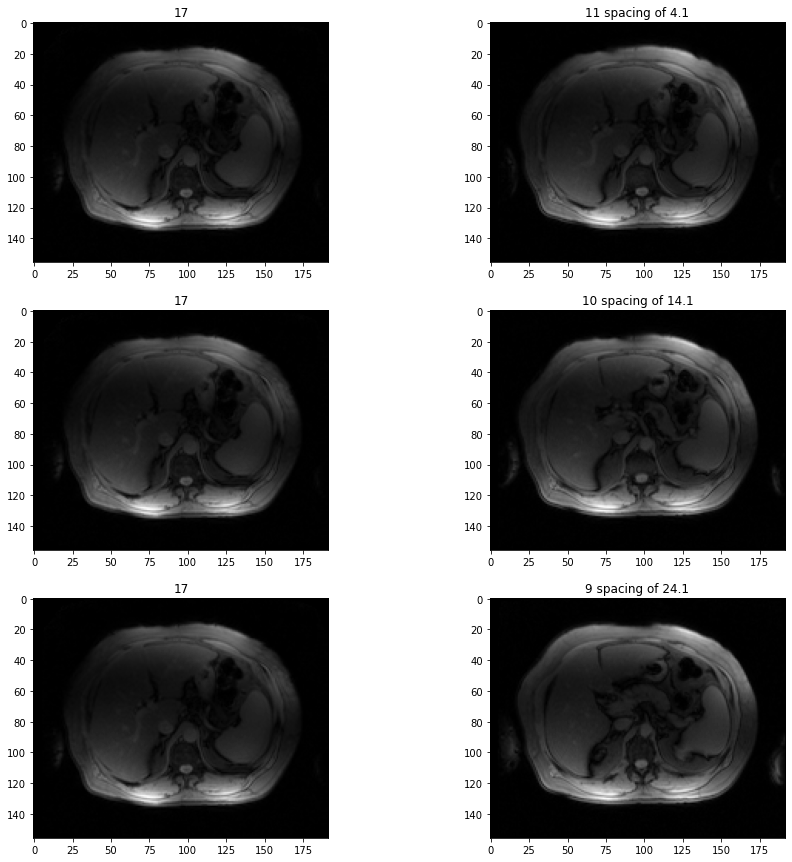

In [422]:
# VERIFY POSITION IS CORRECT

above_space = abs(round(data['slice_location'][num1] - data['slice_location'][num2+1], 2))
current_space = abs(round(data['slice_location'][num1] - data['slice_location'][num2], 2))
below_space = abs(round(data['slice_location'][num1] - data['slice_location'][num2-1], 2))

fig = plt.figure(figsize=(15,15))
fig.add_subplot(3, 2, 1)
plt.imshow(top_dcm,cmap='gray')
plt.title(num1)
fig.add_subplot(3, 2, 2)
plt.imshow(bot_dcm[:,:,2],cmap='gray')
plt.title(str(num2+1) + ' spacing of ' + str(above_space))
fig.add_subplot(3, 2, 3)
plt.imshow(top_dcm,cmap='gray')
plt.title(num1)
fig.add_subplot(3, 2, 4)
plt.imshow(bot_dcm[:,:,1],cmap='gray')
plt.title(str(num2) + ' spacing of ' + str(current_space))
fig.add_subplot(3, 2, 5)
plt.imshow(top_dcm,cmap='gray')
plt.title(num1)
fig.add_subplot(3, 2, 6)
plt.imshow(bot_dcm[:,:,0],cmap='gray')
plt.title(str(num2-1) + ' spacing of ' + str(below_space))
plt.show

In [423]:
# IF NORMAL TOP TO BOTTOM
#dicoms1 = list(data['mag5_dcm_path'][:num1+1])
#dicoms2 = list(data['mag5_dcm_path'][num2:])

# IF REVERSED BOTTOM TO TOP
dicoms1 = list(data['mag5_dcm_path'][num1:])
dicoms2 = list(data['mag5_dcm_path'][:num2+1])

dicom_im1 = dcmread(dicoms1[0]).pixel_array
dicom_im2 = dcmread(dicoms2[0]).pixel_array

dicom_arr1 = np.zeros((dicom_im1.shape[0], dicom_im1.shape[1], len(dicoms1)))
dicom_arr2 = np.zeros((dicom_im2.shape[0], dicom_im2.shape[1], len(dicoms2)))

num = -1
for i in dicoms1:
    num += 1
    dicom = dcmread(i).pixel_array
    dicom_arr1[:,:,num] = dicom
    
num = -1
for i in dicoms2:
    num += 1
    dicom = dcmread(i).pixel_array
    dicom_arr2[:,:,num] = dicom


upper_dcm = dcmread(dicoms1[0])
lower_dcm = dcmread(dicoms2[0])

upper_x = upper_dcm.ImagePositionPatient[0]
lower_x = lower_dcm.ImagePositionPatient[0]

upper_y = upper_dcm.ImagePositionPatient[1]
lower_y = lower_dcm.ImagePositionPatient[1]

diff_x = -(upper_x - lower_x)
diff_y = -(upper_y - lower_y)

upper_ps = upper_dcm.PixelSpacing
lower_ps = lower_dcm.PixelSpacing

if upper_ps[0] == lower_ps[0]:
    pixel_spacing = upper_ps[0]
    print('pixel_spacing: ' + str(upper_ps[0]))
else:
    print('Different pixel spacing')
    
# Affine transofrmation
x_shift = round(diff_x / pixel_spacing)
y_shift = round(diff_y / pixel_spacing)

print('x_shift: ', str(x_shift))
print('y_shift: ', str(y_shift))

M = np.float32([
    [1, 0, x_shift],
    [0, 1, y_shift]
    ])

for i in range(dicom_arr2.shape[2]):
    img = dicom_arr2[:,:,i]
    
    shifted = cv2.warpAffine(img, M, (dicom_im2.shape[1], dicom_im2.shape[0]))
    
    dicom_arr2[:,:,i] = shifted
    
    
# IF NORMAL TOP TO BOTTOM
#combined = np.concatenate((dicom_arr1, dicom_arr2), axis = 2)

# IF REVERSED BOTTOM TO TOP
combined = np.concatenate((dicom_arr2, dicom_arr1), axis = 2)


combined.shape

pixel_spacing: 2.6041667461395
x_shift:  1
y_shift:  1


(156, 192, 28)

<function matplotlib.pyplot.show(close=None, block=None)>

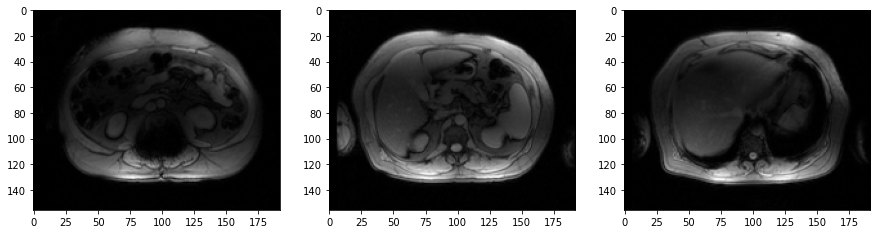

In [424]:
# CHECK IF REVERSED
fig = plt.figure(figsize=(15,15))
fig.add_subplot(1, 3, 1)
plt.imshow(combined[:,:,0],cmap='gray')
fig.add_subplot(1, 3, 2)
plt.imshow(combined[:,:,8],cmap='gray')
fig.add_subplot(1, 3, 3)
plt.imshow(combined[:,:,16],cmap='gray')
plt.show

# BOTTOM OF LIVER SHOULD BE ON THE LEFT

(192, 192, 28)


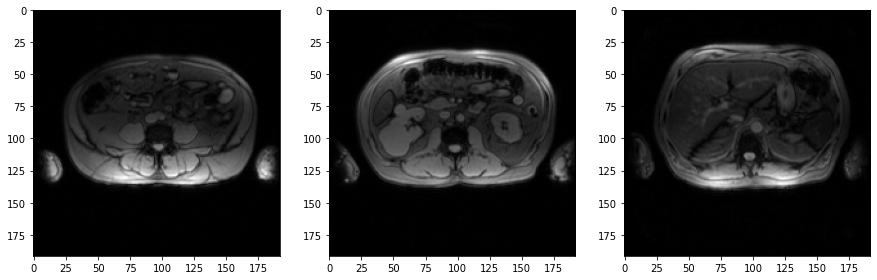

In [288]:
# IF REVERSED, RUN THIS
combined = combined[:,:,::-1]

# CHECK IT FIXED IT
fig = plt.figure(figsize=(15,15))
fig.add_subplot(1, 3, 1)
plt.imshow(combined[:,:,1],cmap='gray')
fig.add_subplot(1, 3, 2)
plt.imshow(combined[:,:,8],cmap='gray')
fig.add_subplot(1, 3, 3)
plt.imshow(combined[:,:,16],cmap='gray')
plt.show
print(combined.shape)

In [425]:
# RESIZE IMAGE IF NEEDED
img_inter = cv2.resize(combined, (224, 224), interpolation = cv2.INTER_LINEAR)
img_inter.shape

(224, 224, 28)

In [426]:
print(patient_id + ' saved')
new_im = nib.Nifti1Image(np.flip(np.rot90(img_inter), 1), affine = np.eye(4))
print(new_im.shape)
nib.save(new_im, os.path.join(nii_output, patient_id))

f_3346 saved
(224, 224, 28)


In [427]:
upper_ss = upper_dcm.SpacingBetweenSlices
lower_ss = lower_dcm.SpacingBetweenSlices

if upper_ss == lower_ss:
    slice_spacing = upper_ss
    print('slice_spacing: ' + str(upper_ss))
else:
    print('Different slice spacing')
    
stitch_diff = data['slice_location'][num1] - data['slice_location'][num2]
print('spacing between upper and lower: ', str(round(stitch_diff, 2)))

slice_spacing: 10
spacing between upper and lower:  14.1


In [428]:
data_table['Patient ID'].append(patient_id)
data_table['original slice spacing'].append(slice_spacing)
data_table['spacing between stitching'].append(stitch_diff)
data_table['num1 (index)'].append(num1)
data_table['num2 (index)'].append(num2)

df = pd.DataFrame(data_table)
df

,Patient ID,original slice spacing,spacing between stitching,num1 (index),num2 (index)
0,f_2421,10.0,11.234158,16,25
1,f_2422,10.0,10.095418,16,24
2,f_2423,10.0,12.231579,16,21
3,f_2429,10.0,8.511827,16,20
4,f_2433,10.0,13.887922,16,21
5,f_2440,10.0,14.430992,16,25
6,f_2481,10.0,6.537529,16,23
7,f_3283,10.0,7.748186,17,10
8,f_3284,10.0,11.113798,17,7
9,f_3290,10.0,5.907990,17,12


In [ ]:
df.to_excel('***.xlsx', index=False)

In [ ]:
# remove files that aren't echo 5

for i in patient_folders:
    path = os.path.join(sot_dir, i)
    
    dcm_list = []

    for root, dirs, files in os.walk(path):
        for file in files:
            if file.endswith(".dcm"):
                dcm_list.append(os.path.join(root, file))
                
    for ii in dcm_list:
        dcm = dcmread(ii)
        echo_num = dcm.EchoNumbers
        
        if echo_num != 5:
            os.remove(ii)